# ECT of image data

#### Sarah McGuire January 2024


In [1]:
import importlib
import time

import numpy as np
import pandas as pd
import math
import seaborn as sns

import scipy.ndimage as ndimage
import scipy.spatial.distance as distance

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

import IPython.display as display

import networkx as nx

# To import/export
from PIL import Image

In [2]:
import os
from os import listdir
from os.path import isfile, join
from pathlib import Path
from itertools import compress, combinations


In [ ]:
import demeter.euler as euler
import demeter.directions as dirs
import demeter.misc as misc
import time
import tifffile as tf

In [254]:
leafECT = np.load('../data/1001_28.npy')


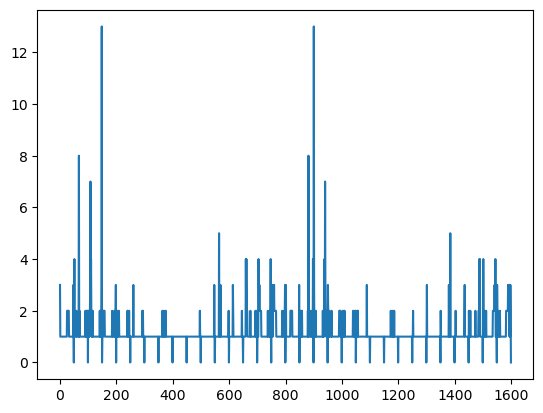

In [262]:
plt.plot(leafECT[4,4])

In [266]:
leafECT[4,4].reshape([32,50])

array([[ 3.,  1.,  1., ...,  3.,  1.,  0.],
       [ 2.,  4.,  1., ...,  2.,  2.,  0.],
       [ 2.,  1.,  1., ...,  3., 13.,  0.],
       ...,
       [ 2.,  1.,  1., ...,  1.,  1.,  0.],
       [ 1.,  4.,  2., ...,  1.,  1.,  0.],
       [ 3.,  2.,  1., ...,  3.,  2.,  0.]])

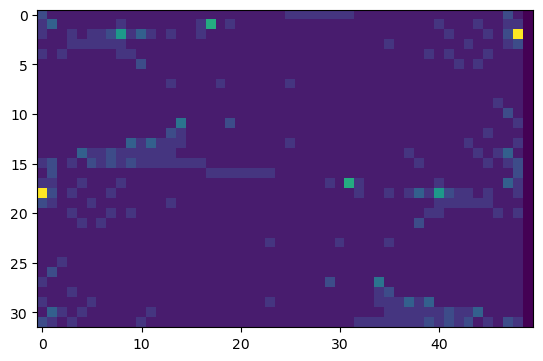

In [267]:
plt.imshow(leafECT[4,4].reshape([32,50]))

In [163]:
leaf = np.load('../data/ALLleaves/Brassica/napus/001_1_4.npy')
#np.load('../data/contour_data/Ivy/Vine1_6.npy')



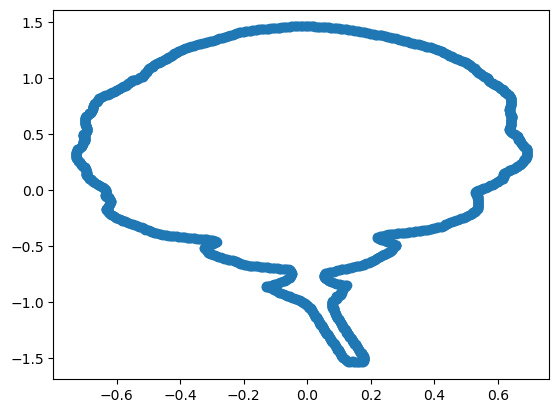

In [164]:
plt.scatter(leaf[:,0],leaf[:,1])

# test Leaf ECT

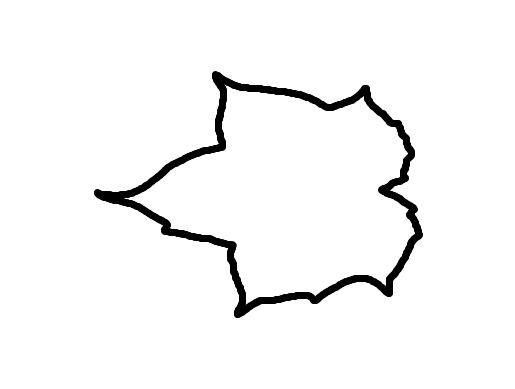

In [249]:
# Create graph of leaf outline
leaf = np.load('../data/ALLleaves/Cotton/720b_1227a.npy')

G = nx.Graph()
for i in range(np.shape(leaf)[0]-1):
    G.add_edge(i, i+1)
G.add_edge(0,np.shape(leaf)[0]-1)

# Get the vertex positions
pos = {}
valuesX = leaf[:,0]
valuesY = leaf[:,1]
for i in range(np.shape(leaf)[0]):
    pos[i] = (valuesX[i],valuesY[i])

options = {
    "node_size": 20,
    "node_color": "black",
    "edgecolors": "black",
    "linewidths": 0.2,
    "width": 1,
    'with_labels':False,
}
nx.draw_networkx(G, pos, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

t 0 newV: []
t 1 newV: []
t 2 newV: []
t 3 newV: []
t 4 newV: []
t 5 newV: []
t 6 newV: []
t 7 newV: []
t 8 newV: []
t 9 newV: []
t 10 newV: []
t 11 newV: []
t 12 newV: []
t 13 newV: []
t 14 newV: []
t 15 newV: [791, 792, 793, 790, 794, 795, 796, 797, 798, 799, 789, 800, 801, 802, 788, 803, 804, 805, 787, 806, 807, 808, 809, 810, 786, 811, 812, 813, 785, 814, 815, 816]
t 16 newV: [784, 817, 818, 819, 820, 821, 822, 782, 783, 823, 824, 825, 826, 853, 854, 781, 827, 828, 829, 852, 855, 856, 779, 780, 830, 831, 851, 857, 776, 777, 778, 832, 833, 849, 850, 858, 774, 775, 834, 845, 846, 847, 848, 859, 1005, 1006, 1007, 1008, 1009, 1010, 772, 773, 835, 843, 844, 860, 1002, 1003, 1004, 1011, 1012, 767, 768, 769, 770, 771, 836, 842, 861, 1000, 1001, 1013, 764, 765, 766, 837, 841, 862, 999, 1014, 1015, 1016, 760, 761, 762, 763, 838, 839, 840, 863, 997, 998, 1017, 1018, 756, 757, 758, 759, 864, 996, 1019, 1020, 754, 755, 865, 995, 1021, 1022, 751, 752, 753, 866, 993, 994, 1023, 1024, 1025, 1026,

t 3 newV: []
t 4 newV: []
t 5 newV: []
t 6 newV: []
t 7 newV: []
t 8 newV: []
t 9 newV: []
t 10 newV: []
t 11 newV: []
t 12 newV: []
t 13 newV: [1418, 1419, 1416, 1417, 1420, 1415, 1421, 1413, 1414, 1422, 1412, 1423, 1411, 1424, 1409, 1410, 1425, 1408, 1426, 1407, 1427]
t 14 newV: [1406, 1428, 1405, 1429, 1404, 1430, 1403, 1431, 1401, 1402, 1432, 1400, 1433, 1398, 1399, 1434, 1397, 1435, 1395, 1396, 1436, 1394, 1437, 1393, 1438, 1391, 1392, 1439, 1390, 1440, 1389, 1441, 1387, 1388, 1442, 1386, 1443, 1384, 1385, 1444, 1382, 1383, 1445, 1380, 1381, 1446, 1377, 1378, 1379, 1447, 1374, 1375, 1376, 1448, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371, 1372, 1373, 1449, 1357, 1358, 1359, 1360, 1361, 1362, 1363, 1450, 1169, 1170, 1171, 1351, 1352, 1353, 1354, 1355, 1356, 1451, 1168, 1172, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350, 1452, 1167, 1173, 1338, 1339, 1340, 1341, 1342, 1453, 1166, 1174, 1329, 1330, 1332, 1333, 1334, 1335, 1336, 1337, 1454, 1165, 1175, 1324, 1325, 1326, 1327, 132

t 34 newV: []
t 35 newV: []
t 36 newV: []
t 37 newV: []
t 38 newV: []
t 39 newV: []
t 40 newV: []
t 41 newV: []
t 42 newV: []
t 43 newV: []
t 44 newV: []
t 45 newV: []
t 46 newV: []
t 47 newV: []
t 0 newV: []
t 1 newV: []
t 2 newV: []
t 3 newV: []
t 4 newV: []
t 5 newV: []
t 6 newV: []
t 7 newV: []
t 8 newV: []
t 9 newV: []
t 10 newV: []
t 11 newV: []
t 12 newV: []
t 13 newV: [0, 1, 1793, 2, 1792, 3, 4, 1791, 5, 1790, 6, 1789, 7, 1788, 8, 1787, 9, 1786, 10, 1785, 11, 1784, 12, 1783, 13, 1782, 14, 1781, 15, 1780, 16, 1779, 17, 1778, 18, 1777, 19, 1776, 20, 1775, 21, 1774, 22, 1773, 23, 1772, 24, 1771, 25, 1770, 26, 1769]
t 14 newV: [27, 1768, 28, 1767, 29, 1766, 30, 1765, 31, 1764, 32, 1763, 33, 1762, 34, 1761, 35, 1760, 36, 1759, 37, 1758, 38, 1757, 39, 1756, 40, 1755, 41, 1754, 42, 1753, 43, 1752, 44, 1751, 45, 1750, 46, 1749, 47, 1748, 48, 1747, 49, 1746, 50, 1745, 51, 1744, 52, 1743, 53, 1742, 54, 1741]
t 15 newV: [55, 1740, 56, 1739, 57, 1738, 58, 1737, 59, 1736, 60, 1735, 61, 1734

t 9 newV: []
t 10 newV: []
t 11 newV: []
t 12 newV: []
t 13 newV: [401, 402, 400, 403, 399, 404, 405, 398, 406, 397, 407, 396, 408, 395, 409, 394, 410, 393, 411, 392, 412, 391, 413]
t 14 newV: [390, 414, 389, 415, 388, 416, 387, 417, 386, 418, 385, 419, 384, 420, 383, 421, 382, 422, 381, 423, 380, 424, 379, 425, 378, 426, 427, 377, 428, 376, 429, 375, 430, 374, 431, 373, 432, 433, 372, 434, 371, 435, 436, 370, 437, 369, 438, 439, 440, 441, 529, 368, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 528, 530, 531, 367, 457, 458, 459, 460, 461, 462, 527, 532, 366, 463, 464, 465, 466, 526, 533, 365, 467, 468, 469, 470, 471, 525, 534, 364, 472, 473, 474, 524, 535, 363, 475, 476, 523, 536, 362, 477, 478, 479, 522, 537]
t 15 newV: [361, 480, 481, 482, 521, 538, 360, 483, 484, 485, 520, 539, 359, 486, 487, 488, 489, 519, 540, 358, 490, 491, 492, 493, 494, 495, 517, 518, 541, 357, 496, 497, 498, 499, 500, 501, 502, 503, 504, 514, 515, 516, 542, 356, 505, 506, 507, 508,

t 40 newV: []
t 41 newV: []
t 42 newV: []
t 43 newV: []
t 44 newV: []
t 45 newV: []
t 46 newV: []
t 47 newV: []


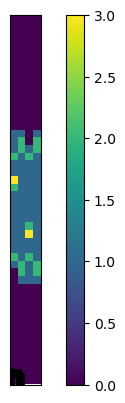

In [250]:
r = 2.9092515639765497

#plt.scatter(center[0],center[1],color='r')
#plt.scatter(x_box,y_box,color='r')
nx.draw_networkx(G, pos, **options)

# Select directions around the circle
numCircleDirs = 4
circledirs =  np.linspace(0, 2*np.pi, num=numCircleDirs, endpoint=False)
# Choose number of thresholds for the ECC
numThresh = 48

# Compute the ECT of leaf p for numCircleDirs, numThresh
ECT_preprocess = {}
for i, angle in enumerate(circledirs):

    outECC = ECC(G, pos, theta=angle, r= r, numThresh = numThresh)

    ECT_preprocess[i] = (angle,outECC)

# Making a matrix M[i,j]: (numThresh x numCircleDirs)
M = np.empty([numThresh,numCircleDirs])
for j in range(M.shape[1]):
    M[:,j] = ECT_preprocess[j][1]
    
plt.imshow(M, origin='lower')
plt.colorbar()

# test graph

In [80]:
G=nx.Graph()
for i in range(10):
    G.add_edge(i, i+1)
G.add_edge(0,10)
print(G.edges())

[(0, 1), (0, 10), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10)]


In [81]:
# Vertex positions of the leaf outline:    
pos = {}
pos[0] = (2,-1)
pos[1] = (2,1)
pos[2] = (2,2)
pos[3] = (1,2)
pos[4] = (0,2)
pos[5] = (-1,2)
pos[6] = (-2,0)
pos[7] = (-3,-1)
pos[8] = (-2,-1)
pos[9] = (-1,-1)
pos[10] = (0,-1)
print(pos)

{0: (2, -1), 1: (2, 1), 2: (2, 2), 3: (1, 2), 4: (0, 2), 5: (-1, 2), 6: (-2, 0), 7: (-3, -1), 8: (-2, -1), 9: (-1, -1), 10: (0, -1)}


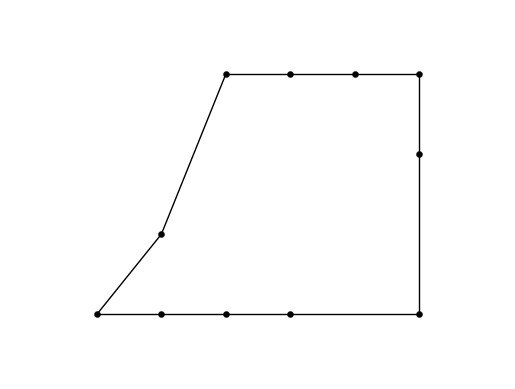

In [82]:
options = {
    "node_size": 20,
    "node_color": "black",
    "edgecolors": "black",
    "linewidths": 0.2,
    "width": 1,
    'with_labels':False,
}
nx.draw_networkx(G, pos, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

In [83]:
extra_pos_list = pos.copy()
extra_pos_list[11] = (5,5)
extra_pos_list[12]= (-4,-3)

In [84]:
# find a bounding box of points
def bounding_box(points):
    x_coord, y_coord = zip(*points)
    return [(min(x_coord), min(y_coord)), (max(x_coord), max(y_coord))]

In [85]:
x_box,y_box = zip(*bounding_box(list(extra_pos_list.values())))
#x_box,y_box = zip(*bounding_box(global_pos_list))
# bounding box size (use to get a radius for the bounding circle)
dist = math.dist((x_box[0],y_box[0]),(x_box[1],y_box[1]))
r = dist/2
# bounding circle center
center = ((x_box[0]+x_box[1])/2, (y_box[0]+y_box[1])/2)



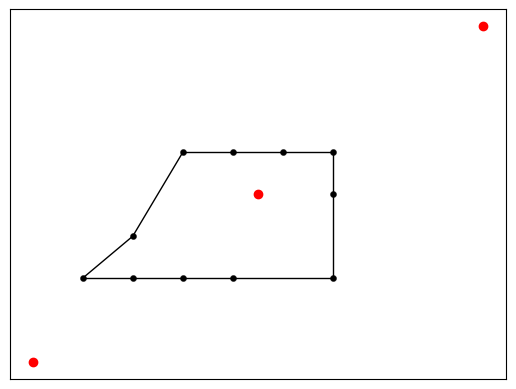

In [91]:
plt.scatter(center[0],center[1],color='r')
plt.scatter(x_box,y_box,color='r')
nx.draw_networkx(G, pos, **options)

In [92]:
# Select directions around the circle
numCircleDirs = 32
circledirs =  np.linspace(0, 2*np.pi, num=numCircleDirs, endpoint=False)
# Choose number of thresholds for the ECC
numThresh = 48

In [104]:
# Compute the ECT of leaf p for numCircleDirs, numThresh
ECT_preprocess = {}
for i, angle in enumerate(circledirs):

    outECC = ECC(G, pos, theta=angle, r= r, numThresh = numThresh)

    ECT_preprocess[i] = (angle,outECC)

newV: []
newV: []
newV: []
newV: []
newV: []
newV: []
newV: []
newV: []
newV: []
newV: []
newV: []
newV: []
newV: []
newV: []
newV: []
newV: [0, 1, 2]
neighbors of 0 : [1, 10]
g(v)= 2.0
g(v) of neighbors: [2.0, 0.0]
neighbors of 1 : [0, 2]
g(v)= 2.0
g(v) of neighbors: [2.0, 2.0]
neighbors of 2 : [1, 3]
g(v)= 2.0
g(v) of neighbors: [2.0, 1.0]
previous EC val: 0
verts: 3
edges: 4
duplicate edges: 2
newV: []
newV: []
newV: []
newV: [3]
neighbors of 3 : [2, 4]
g(v)= 1.0
g(v) of neighbors: [2.0, 0.0]
previous EC val: 1
verts: 1
edges: 1
duplicate edges: 0
newV: []
newV: []
newV: []
newV: [4, 10]
neighbors of 4 : [3, 5]
g(v)= 0.0
g(v) of neighbors: [1.0, -1.0]
neighbors of 10 : [9, 0]
g(v)= 0.0
g(v) of neighbors: [-1.0, 2.0]
previous EC val: 1
verts: 2
edges: 2
duplicate edges: 0
newV: []
newV: []
newV: []
newV: [5, 9]
neighbors of 5 : [4, 6]
g(v)= -1.0
g(v) of neighbors: [0.0, -2.0]
neighbors of 9 : [8, 10]
g(v)= -1.0
g(v) of neighbors: [-2.0, 0.0]
previous EC val: 1
verts: 2
edges: 2
dupli

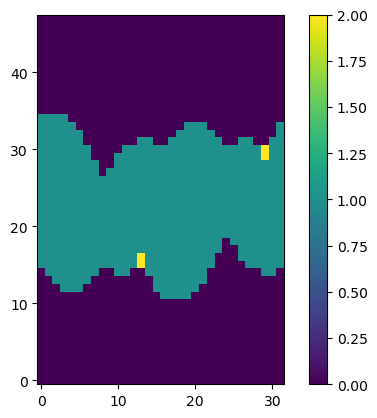

In [105]:
# Making a matrix M[i,j]: (numThresh x numCircleDirs)
M = np.empty([numThresh,numCircleDirs])
for j in range(M.shape[1]):
    M[:,j] = ECT_preprocess[j][1]
    
plt.imshow(M, origin='lower')
plt.colorbar()

# Get a global dataset bounding box using all points in the dataset

[]
1.3469


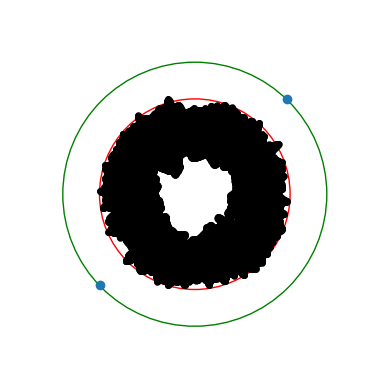

In [329]:
# collect list of all points in dataset
mypath = '../data/ALLleaves/test'
global_pos_list = []
#loop through file system
for path, subdirs, files in os.walk(mypath):
    print(subdirs)
    files = [f for f in files if not f[0] == '.']
    subdirs[:] = [d for d in subdirs if not d[0] == '.']
    max_dist = 0
    for name in files:
        input_filedir = os.path.join(path, name)
        leaf = np.load(input_filedir)
        valuesX = leaf[:,0]
        valuesY = leaf[:,1]
        for i in range(np.shape(leaf)[0]):
            global_pos_list.append((valuesX[i],valuesY[i]))

        G = nx.Graph()
        for i in range(np.shape(leaf)[0]-1):
            G.add_edge(i, i+1)
        G.add_edge(0,np.shape(leaf)[0]-1)

        # Get the vertex positions
        pos = {}
        valuesX = leaf[:,0]
        valuesY = leaf[:,1]
        for i in range(np.shape(leaf)[0]):
            pos[i] = (valuesX[i],valuesY[i])

        options = {
            "node_size": 20,
            "node_color": "black",
            "edgecolors": "black",
            "linewidths": 0.2,
            "width": 1,
            'with_labels':False,
        }
        nx.draw_networkx(G, pos, **options)

        # Set margins for the axes so that nodes aren't clipped
        ax = plt.gca()
        ax.margins(0.20)
        plt.axis("off")
        
        #compute box and distance for this leaf
        x_box_cotton,y_box_cotton = zip(*bounding_box(global_pos_list))
        dist = math.dist((x_box_cotton[0],y_box_cotton[0]),(x_box_cotton[1],y_box_cotton[1]))
        if dist > max_dist:
            max_dist = dist
            
maxcoord = max(abs(x_box_cotton[0]), abs(y_box_cotton[0]), abs(x_box_cotton[1]), abs(y_box_cotton[1]))
print(maxcoord)
circle1 = plt.Circle((0, 0), r, color='g', fill=False)
circle2 = plt.Circle((0, 0), maxcoord, color='r', fill=False)

#fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
ax.add_patch(circle1)
ax.add_patch(circle2)
cot=plt.scatter(x_box_cotton,y_box_cotton)
ax.set_aspect('equal')

plt.show()

In [326]:
points = [(1,0), (0,1), (-1,0), (0,-1)]
#compute box and distance for this leaf
x_box,y_box = zip(*bounding_box(points))
print(x_box, y_box)
dist = math.dist((x_box[0],y_box[0]),(x_box[1],y_box[1]))
print(dist)
x_pts,y_pts = zip(*points)

maxcoord = max(abs(x_box[0]), abs(y_box[0]), abs(x_box[1]), abs(y_box[1]))
print(maxcoord)

(-1, 1) (-1, 1)
2.8284271247461903
1


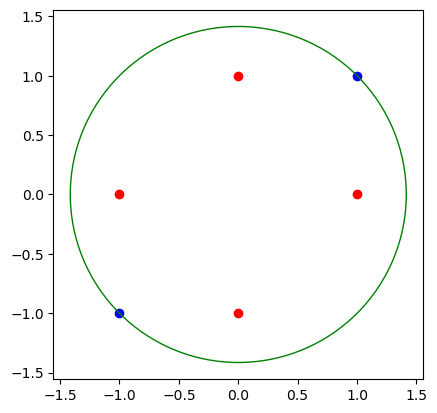

In [324]:
fig, ax = plt.subplots()
plt.scatter(x_box,y_box, color='b')
plt.scatter(x_pts,y_pts, color='r')
circle1 = plt.Circle((0, 0), dist/2, color='g', fill=False)
ax.add_patch(circle1)
ax.set_aspect('equal')

plt.show()

In [265]:
dist = math.dist((x_box_cotton[0],y_box_cotton[0]),(x_box_cotton[1],y_box_cotton[1]))
r = dist/2
print(r)

1.8655618590655203


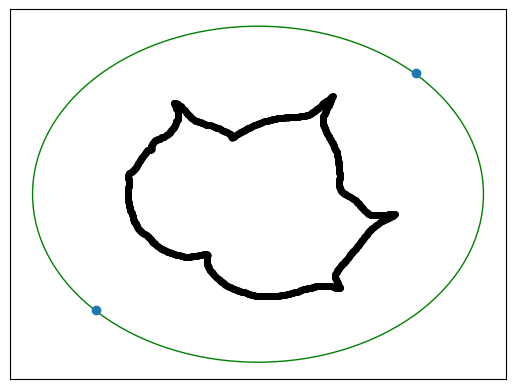

In [330]:

circle1 = plt.Circle((0, 0), r, color='g', fill=False)

fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot


ax.add_patch(circle1)
cot=plt.scatter(x_box_cotton,y_box_cotton)
nx.draw_networkx(G, pos, **options)
plt.show()

In [328]:
x_box_cotton,y_box_cotton = zip(*bounding_box(global_pos_list))
#x_box_cotton,y_box_cotton = zip(*bounding_box(cotton_list))

In [119]:
alstroemeria = (x_box_alstroemeria,y_box_alstroemeria)
alstroemeria

((-1.7906, 1.728), (-1.5759, 1.6234))

In [116]:
apple = (x_box_apple, y_box_apple)
apple

((-1.6703, 1.6698), (-1.684, 1.7239))

In [115]:
arabidopsis = (x_box_arabidopsis,y_box_arabidopsis)
arabidopsis

((-1.3615, 1.4057), (-1.8453, 1.823))

In [122]:
brassica = (x_box_brassica,y_box_brassica)
brassica

((-1.7097, 1.8645), (-1.8229, 1.7276))

In [125]:
coleus = (x_box_coleus,y_box_coleus)
coleus

((-1.7974, 1.7951), (-1.7953, 1.8027))

In [128]:
cotton = (x_box_cotton,y_box_cotton)
cotton

((-1.9687, 2.0561), (-2.0308, 2.0648))

In [131]:
grape = (x_box_grape,y_box_grape)
grape

((-1.7144, 1.6385), (-1.6796, 2.0567))

In [134]:
grass = (x_box_grass,y_box_grass)
grass

((-1.677, 1.6833), (-1.6652, 1.687))

In [137]:
ivy = (x_box_ivy,y_box_ivy)
ivy

((-1.3829, 1.1426), (-1.2935, 1.3373))

In [140]:
passiflora = (x_box_passiflora,y_box_passiflora)
passiflora

((-1.8384, 1.8325), (-2.0367, 2.1652))

In [143]:
pepper = (x_box_pepper,y_box_pepper)
pepper

((-0.93779, 0.97649), (-2.0133, 1.9236))

In [146]:
potato = (x_box_potato,y_box_potato)
potato

((-1.5554, 1.5728), (-1.5101, 1.5487))

In [149]:
tomato = (x_box_tomato,y_box_tomato)
tomato

((-1.8667, 1.8008), (-1.8546, 2.106))

In [152]:
viburnum = (x_box_viburnum,y_box_viburnum)
viburnum

((-1.6535, 1.6661), (-1.8706, 1.8135))

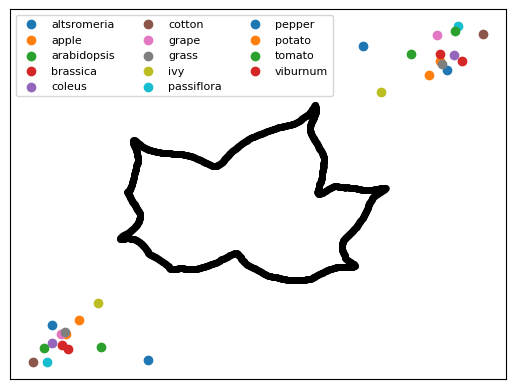

In [185]:
als= plt.scatter(x_box_alstroemeria,y_box_alstroemeria)
app=plt.scatter(x_box_apple,y_box_apple)
ara= plt.scatter(x_box_arabidopsis,y_box_arabidopsis)
bra=plt.scatter(x_box_brassica,y_box_brassica)
col=plt.scatter(x_box_coleus,y_box_coleus)
cot=plt.scatter(x_box_cotton,y_box_cotton)
gra=plt.scatter(x_box_grape,y_box_grape)
grs=plt.scatter(x_box_grass,y_box_grass)
ivy=plt.scatter(x_box_ivy,y_box_ivy)
pas=plt.scatter(x_box_passiflora,y_box_passiflora)
pep=plt.scatter(x_box_pepper,y_box_pepper)
pot=plt.scatter(x_box_potato,y_box_potato)
tom=plt.scatter(x_box_tomato,y_box_tomato)
vib=plt.scatter(x_box_viburnum,y_box_viburnum)
plt.legend((als,app,ara,bra,col,cot,gra,grs,ivy,pas,pep,pot,tom,vib),
           ('altsromeria', 'apple', 'arabidopsis', 'brassica', 'coleus', 'cotton', 'grape', 'grass','ivy','passiflora','pepper','potato','tomato','viburnum'),
           scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=8)
nx.draw_networkx(G, pos, **options)

plt.show()

In [197]:
x_box_CTEST,y_box_CTEST = zip(*bounding_box(list(pos.values())))

In [223]:
print(x_box_cotton)
print(y_box_cotton)

(-1.3386, -1.3025)
(-0.11363, -0.1056)


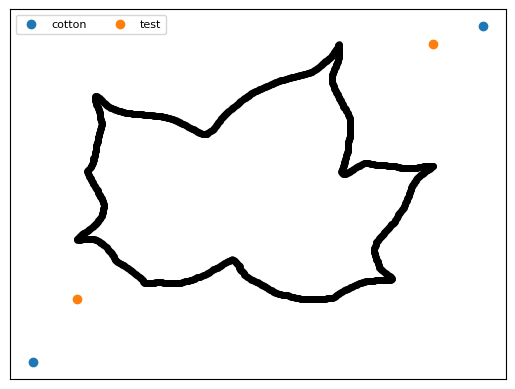

In [243]:
cot=plt.scatter(x_box_cotton,y_box_cotton)
test=plt.scatter(x_box_CTEST,y_box_CTEST)
plt.legend((cot,test),
           ('cotton','test'),
           scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=8)
nx.draw_networkx(G, pos, **options)

plt.show()

In [179]:
print(x_box_cotton)
print(y_box_cotton)

(-1.9687, 2.0561)
(-2.0308, 2.0648)


In [ ]:
math.dist((x_box_[0],y_box[0]),(x_box[1],y_box[1]))

In [176]:
r = 2.9092515639765497
r_threshes = np.linspace(r, -r, 16)
print(r_threshes)

[ 2.90925156  2.52135136  2.13345115  1.74555094  1.35765073  0.96975052
  0.58185031  0.1939501  -0.1939501  -0.58185031 -0.96975052 -1.35765073
 -1.74555094 -2.13345115 -2.52135136 -2.90925156]


In [184]:
ecc = ECC(G, pos, theta=45, r=r, numThresh=16)

t 0 newV: []
t 1 newV: []
t 2 newV: []
t 3 newV: []
t 4 newV: [1178, 1177, 1179, 1176, 1180, 1175, 1181, 1174, 1173, 1182, 1172, 1183, 1171, 1184, 1170, 1185, 1169, 1168, 1186, 1167, 1187, 1166, 1165, 1188, 1164, 1189, 1163, 1190, 1162, 1161, 1191, 1160, 1192, 1159, 1193, 1158, 1194, 1157, 1195, 1156, 1155, 1196, 1154, 1197, 1153, 1198, 1152, 1199, 1151, 1150, 1200, 1149, 1201, 1148, 1202, 1147, 1203, 1146, 1204, 1145, 1205, 1144, 1143, 1206, 1142, 1207, 1141, 1140, 1208, 1139, 1209, 1138, 1210, 1137, 1211, 1136, 1135, 1212, 1213, 1134, 1214, 1133, 1132, 1215, 1131, 1216, 1130, 1129, 1217, 1128, 1218, 1127, 1219, 1126, 1220, 1125, 1221, 1124, 1123, 1222, 1122, 1223, 1121, 1224, 1120, 1119, 1225, 1118, 1226, 1117, 1116, 1227, 1115, 1228, 1114, 1113, 1229, 1112, 1230, 1111, 1110, 1231, 1109, 1108, 1232, 1233, 1107, 1106, 1234, 1105, 1104, 1235, 1103, 1236, 1102, 1237, 1101, 1238, 1100, 1239, 1099, 1098, 1240, 1097, 1241, 1096, 1095, 1242, 1243, 1094, 1244, 1093, 1092, 1245]
t 5 newV: [10

t 11 newV: []
t 12 newV: []
t 13 newV: []
t 14 newV: []
t 15 newV: []


In [182]:
ecc

[0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]

In [4]:
# find a bounding box of points
def bounding_box(points):
    x_coord, y_coord = zip(*points)
    return [(min(x_coord), min(y_coord)), (max(x_coord), max(y_coord))]

## r value for bounding box comes from here!

In [5]:
x_box,y_box = zip(*bounding_box(global_pos_list))
# bounding box size (use to get a radius for the bounding circle)
dist = math.dist((x_box[0],y_box[0]),(x_box[1],y_box[1]))
r = dist/2
# bounding circle center
center = ((x_box[0]+x_box[1])/2, (y_box[0]+y_box[1])/2)

### Function to compute ECC for a given direction

In [171]:
def find_combos(newV):
    #res = list(combinations(newV, 2))
    res = []
    n = len(newV)
    for i in range(n):
        for j in range(i+1, n):
            res.append((newV[i], newV[j]))
    return res

def lower_edges(v, G, pos_list, omega):
    """
    Function compute the number of lower edges of a vertex v for a specific direction (included by the use of sorted v_list).
    """
    L = [n for n in G.neighbors(v)]
    #print('neighbors of', v,':',L)
    gv = np.dot(pos_list[v],omega)
    #print('g(v)=', gv)
    Lg = [np.dot(pos_list[v],omega) for v in L]
    #print('g(v) of neighbors:', Lg)
    return sum(n >= gv for n in Lg) # includes possible duplicate counts 



def ECC(G, pos, theta, r, numThresh):
    """
    Function to compute the Euler Characteristic of a graph with coordinates for each vertex (pos), 
    using a specified number of thresholds and bounding box defined by radius r.
    """
        
    omega = (np.cos(theta), np.sin(theta))
    
    # list of vertices and vertex positions
    v_list = list(pos.keys())
    pos_list = list(pos.values())
    
    # function g 
    def g(v): 
        return np.dot(pos_list[v],omega)
    # sort the v_list using g(v)
    v_list.sort(key=g, reverse = True) 

    def count_duplicate_edges(newV, G):
        """
        Function to count the number of duplicate counted edges from lower_edges. These duplicate edges are added to the EC value.
        """
        res = find_combos(newV)
        count=0
        for v,w in res:
            if G.has_edge(v,w) and g(v)==g(w):
                count+=1
        return count 

    # thresholds for filtration, r should be defined from global bounding box
    r_threshes = np.linspace(r, -r, numThresh)
    
    # Full ECC vector
    ecc=[]
    ecc.append(0)

    
    for i in range(numThresh):

        #set of new vertices that appear in this threshold band
        if i==numThresh-1:
            newV =list(compress(v_list,[r_threshes[i]>g(v) for v in v_list]))
        else:
            newV =list(compress(v_list,[r_threshes[i]>g(v)>=r_threshes[i+1] for v in v_list]))
        print('t', i, 'newV:', newV)
        x = ecc[i]#previous value of ECC (not index i-1 becuase of extra 0 appended to begining)
        if newV: # if there's new vertices to count
            v_count=0
            e_count=0
            for v in newV:
                k = lower_edges(v, G, pos_list, omega)
                v_count+=1 #add 1 to vertex count
                e_count+=k #subtract the the number of lower edges
            #check for duplicate edges counted

            dupl = count_duplicate_edges(newV, G)
            # after counting all new vertices and edges
            #print('previous EC val:', x)
            #print('verts:', v_count)
            #print('edges:', e_count)
            #print('duplicate edges:', dupl)
            ecc.append(x+v_count-e_count+dupl)
        else:
            ecc.append(x)
    ecc = ecc[1:] #Drop the initial 0 value
    #print('ECC for direction', omega, '= ', ecc)
    
    return ecc

In [21]:
#TESTING ECC FOR 1 direction, 1 file 
input_filedir = '../data/ALLleaves/Cotton/2a_861b.npy'
#'../data/ALLleaves/Ivy/Vine1_4.npy'


In [22]:
leaf = np.load(input_filedir)

In [23]:
# Create graph of leaf outline
G = nx.Graph()
for i in range(np.shape(leaf)[0]-1):
    G.add_edge(i, i+1)
G.add_edge(0,np.shape(leaf)[0]-1)

In [24]:
# Get the vertex positions
pos = {}
valuesX = leaf[:,0]
valuesY = leaf[:,1]
for i in range(np.shape(leaf)[0]):
    pos[i] = (valuesX[i],valuesY[i])

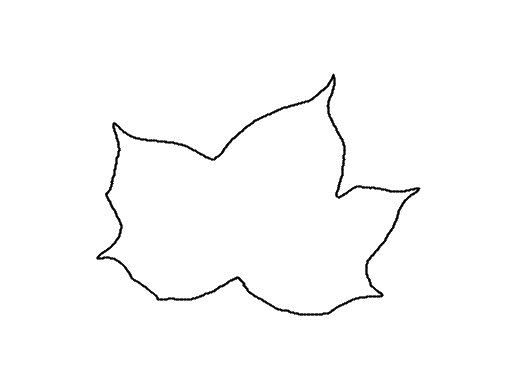

In [45]:
options = {
    "node_size": 1,
    "node_color": "black",
    "edgecolors": "black",
    "linewidths": 0.2,
    "width": 0.4,
    'with_labels':False,
}
nx.draw_networkx(G, pos, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

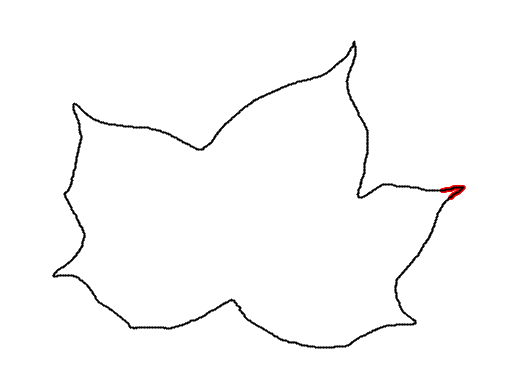

In [63]:
#Plot subgraph of the leaf
options2 = {
    "node_size": 10,
    "node_color": "red",
    "edgecolors": "red",
    "linewidths": 0.2,
    "width": 0.4,
    'with_labels':False,
}
res = [l for l in range(750,800)]
k = G.subgraph(res)
nx.draw_networkx(k, pos=pos, **options2)
nx.draw_networkx(G, pos, **options)
plt.axis('off')
plt.savefig("Cotton_full.png", dpi=1000)

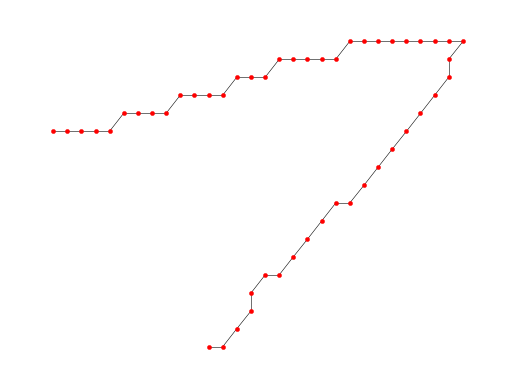

In [64]:
nx.draw_networkx(k, pos=pos, **options2)
plt.axis('off')
plt.savefig("Cotton_zoom.png", dpi=1000)

In [12]:
# Select directions around the circle
numCircleDirs = 32
circledirs =  np.linspace(0, 2*np.pi, num=numCircleDirs, endpoint=False)

In [13]:
# Choose number of thresholds for the ECC
numThresh = 48

In [14]:
# Compute the ECT of leaf p for numCircleDirs, numThresh
ECT_preprocess = {}
for i, angle in enumerate(circledirs):

    outECC = ECC(G, pos, theta=angle, r= r, numThresh = numThresh)

    ECT_preprocess[i] = (angle,outECC)

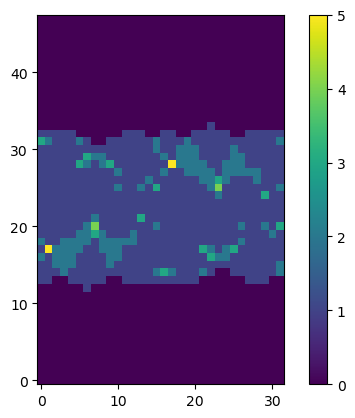

In [15]:
# Making a matrix M[i,j]: (numThresh x numCircleDirs)
M = np.empty([numThresh,numCircleDirs])
for j in range(M.shape[1]):
    M[:,j] = ECT_preprocess[j][1]

#plot the matrix
plt.imshow(M, origin='lower')
plt.colorbar()

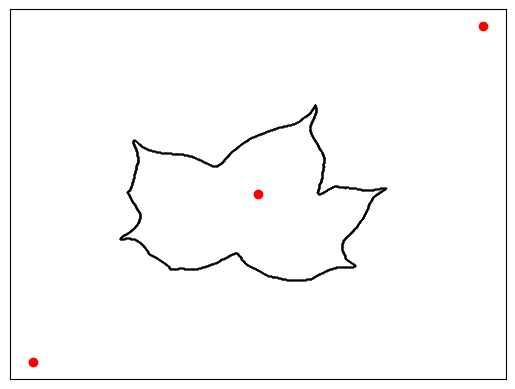

In [17]:
plt.scatter(x_box,y_box, color='r')
plt.scatter(center[0],center[1],color='r')
nx.draw_networkx(G, pos, **options)

## LOOP THROUGH FILESYSTEM AND COMPUTE ECT

FOR each leaf...
- Get the vertex positions from original file (pos)
- Compute ECT
- Save ECT matrix
    

In [19]:
dataset = []  
mypath = '../data/ALLleaves/Alstroemeria'
#loop through file system

for path, subdirs, files in os.walk(mypath):
    
    files = [f for f in files if not f[0] == '.']
    subdirs[:] = [d for d in subdirs if not d[0] == '.']
    
    for name in files:
        
        input_filedir = os.path.join(path, name)
        output_filedir = os.path.join('../data/ALLleaves_ECT/Alstroemeria'+ input_filedir[len(mypath):])
        #output_filedir = os.path.join('../data/ALLleaves_ECT'+ input_filedir[len(mypath):])
    
        leaf = np.load(input_filedir)
    
        # Create graph of leaf outline
        G = nx.Graph()
        for i in range(np.shape(leaf)[0]-1):
            G.add_edge(i, i+1)
        G.add_edge(0,np.shape(leaf)[0]-1)

        # Get the vertex positions
        pos = {}
        valuesX = leaf[:,0]
        valuesY = leaf[:,1]
        for i in range(np.shape(leaf)[0]):
            pos[i] = (valuesX[i],valuesY[i])

        # Select directions around the circle
        numCircleDirs = 32
        circledirs =  np.linspace(0, 2*np.pi, num=numCircleDirs, endpoint=False)

        # Choose number of thresholds for the ECC
        numThresh = 48

        # Compute the ECT of leaf p for numCircleDirs, numThresh
        ECT_preprocess = {}
        for i, angle in enumerate(circledirs):

            outECC = ECC(G, pos, theta=angle, r=r, numThresh = numThresh)

            ECT_preprocess[i] = (angle,outECC)

        # Making a matrix M[i,j]: (numThresh x numCircleDirs)
        M = np.empty([numThresh,numCircleDirs])
        for j in range(M.shape[1]):
            M[:,j] = ECT_preprocess[j][1]


        # NPY file to save
        Path(os.path.dirname(output_filedir)).mkdir(parents=True, exist_ok=True)
        np.save(output_filedir, M)

        # flatten array and append to dataset list for statistics computation of entire dataset
        dataset.append(M.flatten())


In [189]:
# calculate global min, max, average, and standard deviation of dataset for normalization later
global_mean = np.mean(dataset)
global_std = np.std(dataset)
global_min = np.min(dataset)
global_max = np.max(dataset)

In [190]:
print('----------------')
print('Dataset statistics')
print('----------------')
print('min:', global_min)
print('max:', global_max)
print('mean:', global_mean)
print('std:', global_std)

----------------
Dataset statistics
----------------
min: 0.0
max: 30.0
mean: 3.0390625
std: 4.4601575500304635


1